# Вычисление объёма n-мерной фигуры с помощью метода Монте-Карло

## 1. Подключение библиотеки

Для простоты сократим hypersand до hs.

In [1]:
import hypersand as hs

## 2. Определение осей

Выберем n. Назовем оси для будущей двумерной фигуры: "x1", "x2", .. , "xn":

In [2]:
n = 8
keys = []
for i in range(n):
    keys.append("x" + str(i + 1))
keys

['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']

## 3. Генерация данных

Сгенерируем n синусоид, состоящих из 10 периодов, с амплитудами от 4.5 до 5.5, сдвинутые вверх по оси y на 20, с частотой дискретизации 1e-2.

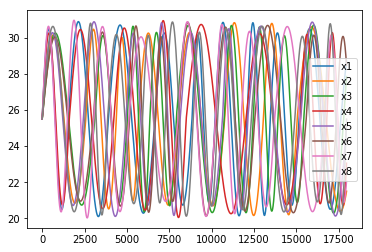

In [3]:
data = hs.generateDF(keys, periods=10, amplitudes=[4.5, 5.5], ground=20, sample_rate=1e-2)
data.plot()

## 4. Генерация случайных точек

Сгенерируем 100 случайных точек. Так как график в фазовой плоскости для произвольной размерности построить нельзя, то не будем его выводить. Просто выведем таблицу из случайно сгенерированных точек.

In [4]:
rp = hs.throw_points(data, 100)
rp.head()

,x1,x2,x3,x4,x5,x6,x7,x8
0,27.449475,20.856078,27.626663,27.505209,25.863752,27.502992,29.973191,22.754551
1,29.058255,21.223170,28.213303,23.813582,23.389621,22.860912,27.022719,21.631845
2,29.725662,29.608174,22.478722,24.477051,29.543723,23.814042,23.898221,29.299253
3,22.799784,22.707952,26.120625,25.108850,24.710815,25.467309,29.771509,21.584243
4,29.958753,23.026997,22.134991,29.366967,20.932541,28.581095,30.533124,27.815351


## 5. Пересечения для 0-й точки

Построим n гиперплоскостей, параллельных каждой из осей, пересекающие условную 0-ю точку, и найдем точки пересечения этих гиперплоскостей с фигурой.

In [5]:
intersections = hs.get_intersections(data, rp.iloc[0], 1e-2)
intersections.head()

,x1,x2,x3,x4,x5,x6,x7,x8
0,27.45791523344296,26.61565148242569,26.44800732948212,27.310626307872667,26.714196923937305,26.43111217268071,27.588988520794945,26.756313338412674
1,27.453932882434025,30.148071056724014,30.16825701491291,27.729218306673705,30.21953720531141,29.988474218633332,26.979060606545723,30.606601323227288
2,27.443361294544918,21.644097099842952,24.24603644171148,26.535472603039636,20.998667929081293,23.864761647170045,29.415010644425312,21.006458079883465
3,27.456795809536644,21.637712936062883,24.236738103214552,26.547062852342627,20.994422835941222,23.855925725815727,29.430470024587784,21.000250347073994
4,27.452194466071546,25.72601100906082,21.356798930728928,28.98870151486066,27.58560461796652,21.94448979960825,20.22331938105857,27.191077738735903


## 6. Определение попаданий

То же самое проделаем со всеми остальными точками. Если точка оказалась вне границ фигуры, будем считать, то она не попала в фигуру. Точность, с которой будем проверять попадания, выберем равной 1e-2.

Важно: вычисления могут занять достаточно долгое время. В данном случае порядка 10 минут. Время зависит от размерности, общего количества точек в фигуре, количества случайно сгенерированных точек, а так же от производительности процессора.

In [6]:
[hits, misses] = hs.hit_analysis(data, rp, 1e-2)
print("Попаданий: " + str(len(hits)))
print("Промахов: " + str(len(misses)))

Попаданий: 87
Промахов: 13


## 7. Вычисление объёма

Вычислим объем внутренней части фигуры с помощью формулы: объем фигуры = объем кубоида * количество попаданий / общее количество бросков.

In [7]:
volume = hs.cuboid_volume(data) * len(hits) / len(rp)
print(volume)

156663474.03146243


Можно было пропустить пункты 5 и 6 - вызвать функцию, которая уже включает в себя операции из пунктов 5 и 6, и получить тот же ответ:

In [8]:
volume = hs.montecarlo(data, rp, 1e-2)
print(volume)

156663474.03146243
